# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [167]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [168]:
#lets build our URL , fetch url from the API documentation
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&q=" 

In [169]:
#------------------check how the json response looks like , for referencing its data-----------
#query_url = f"{base_url}appid={weather_api_key}&q=sortland"
#print(query_url)
#response = requests.get(query_url).json()
#pprint(response)
#---------------------- Test Complete -----------------------------------------------------------------


In [170]:
#Set up lists to hold responses
lat= []
temp = []
humid = []
cloud = []
w_speed = []


# Loop through the list of cities and perform successive API calls ,append the responses to respective lists.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"City Name : {response['name']} \nCity Number : {response['id']}\n")
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp']*1.8 - 459.67) # default Unit for temp is kelvin,convert to Fahrenheit
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed']) 
    except KeyError:
              print("City not found, Skipping iteration\n")


City Name : Tiznit Province 
City Number : 2527087

City Name : Carnarvon 
City Number : 2074865

City Name : Pacific Grove 
City Number : 5380437

City Name : Talnakh 
City Number : 1490256

City Name : Kikwit 
City Number : 2314705

City Name : Arraial do Cabo 
City Number : 3471451

City Name : Manaus 
City Number : 3663517

City Name : Mehamn 
City Number : 778707

City Name : Thunder Bay 
City Number : 6166142

City Name : Rikitea 
City Number : 4030556

City Name : Chui 
City Number : 3443061

City Name : Port Alfred 
City Number : 964432

City Name : Ushuaia 
City Number : 3833367

City Name : Klaksvík 
City Number : 2618795

City Name : Tasiilaq 
City Number : 3424607

City Name : San Cristobal 
City Number : 3628473

City Name : Chumikan 
City Number : 2025256

City Name : Morros 
City Number : 3394372

City Name : Cap Malheureux 
City Number : 934649

City Name : Airai 
City Number : 1651810

City Name : Ponta do Sol 
City Number : 2264557

City Name : Sitka 
City Number : 55

City Name : Cervo 
City Number : 3125287

City Name : Cessnock 
City Number : 2171845

City Name : Pevek 
City Number : 2122090

City Name : Makakilo City 
City Number : 5850554

City Name : Marabu 
City Number : 1738050

City Name : Coyhaique 
City Number : 3894426

City Name : Omboué 
City Number : 2396853

City Name : Bonavista 
City Number : 5905393

City Name : Vestmannaeyjar 
City Number : 3412093

City not found, Skipping iteration

City Name : Mount Gambier 
City Number : 2156643

City Name : Alice Springs 
City Number : 2077895

City Name : Severo-Kuril'sk 
City Number : 2121385

City Name : Otukpo 
City Number : 2328113

City not found, Skipping iteration

City not found, Skipping iteration

City Name : Changtu 
City Number : 2038139

City Name : Taoudenni 
City Number : 2450173

City Name : Bella Union 
City Number : 3443631

City Name : Hailar 
City Number : 2037078

City Name : Malé 
City Number : 1282027

City Name : Øksfjord 
City Number : 778362

City Name : Hambantota 

City Name : Kamenka 
City Number : 553766

City Name : Emerald 
City Number : 2167426

City Name : San Patricio 
City Number : 3985168

City not found, Skipping iteration

City Name : Assiut 
City Number : 359783

City Name : Usinsk 
City Number : 863061

City Name : Lucapa 
City Number : 145724

City Name : Santa Rosa 
City Number : 1687894

City Name : Hualmay 
City Number : 3939761

City Name : Charter Township of Clinton 
City Number : 4989133

City Name : Tocopilla 
City Number : 3869716

City Name : Hofn 
City Number : 2630299

City Name : Klyuchi 
City Number : 1503153

City Name : Libreville 
City Number : 2399697

City Name : Namatanai 
City Number : 2090021

City Name : Cockburn Town 
City Number : 3576994

City Name : Port-Gentil 
City Number : 2396518

City Name : At-Bashi 
City Number : 1528796

City Name : Kumul 
City Number : 1529484

City Name : Nanyamba 
City Number : 877581

City Name : Laas 
City Number : 3175096

City Name : Partizánske 
City Number : 3058268

City 

City Name : Novoagansk 
City Number : 1497210

City Name : Nouadhibou 
City Number : 2377457

City Name : Ibrā’ 
City Number : 287832

City Name : Tezu 
City Number : 1254709

City Name : Morón 
City Number : 3430545

City Name : Mineros 
City Number : 3910343

City Name : Morgan City 
City Number : 4333811

City Name : Tommot 
City Number : 2015179

City Name : Bentiu 
City Number : 377472

City Name : Vestmanna 
City Number : 2610343

City Name : Alghero 
City Number : 3183284

City Name : Russell 
City Number : 4047434

City Name : Ritchie 
City Number : 961226

City not found, Skipping iteration

City Name : Mthatha 
City Number : 946058

City Name : Vila do Maio 
City Number : 3374120

City Name : Homer 
City Number : 5864145

City Name : Athabasca 
City Number : 5887916

City Name : Kuruman 
City Number : 986134

City Name : Husavik 
City Number : 2629833

City Name : Kibala 
City Number : 2425791

City Name : Kiryat Gat 
City Number : 293842

City Name : Todos Santos 
City Numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [178]:
# Zip the list of the responses               
zippedList = list(zip(cities,lat,temp,humid,cloud,w_speed))

#Convert to a DataFrame and Name the Columns
cityWeather = pd.DataFrame(zippedList, columns = ['City' , 'Latitude', 'Temperature (F)', 'Humidity (%)' , 'Cloudiness (%)' , 'Wind Speed (mph)'])

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cityWeather.to_csv("city_weather.csv", encoding="utf-8", index=False)

print("\n\n... Below is the current weather for the Cities selected randomly ...")
cityWeather



... Below is the current weather for the Cities selected randomly ...


,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tiznit,29.58,71.474,40,72,1.01
1,carnarvon,-24.87,71.600,88,59,3.60
2,pacific grove,36.62,56.948,63,75,4.60
3,talnakh,69.49,33.800,80,100,7.00
4,kikwit,-5.04,72.518,83,95,0.83
...,...,...,...,...,...,...
533,bahile,-20.23,78.872,76,1,6.80
534,naenwa,51.37,50.504,61,0,0.50
535,kazalinsk,26.98,63.644,23,10,2.85
536,haines junction,26.18,60.098,72,40,1.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

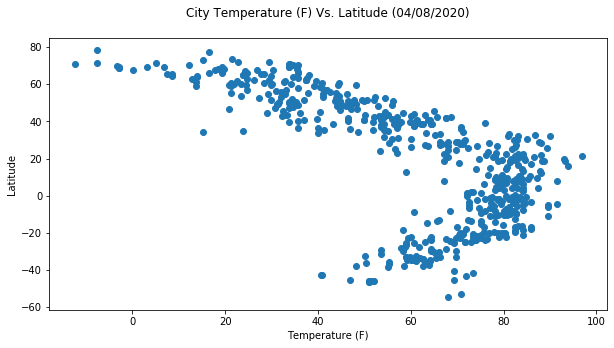

In [179]:
# create a plot canvas 
plt.figure(figsize=(10,5))

# add x,y values to it
x_values = cityWeather['Temperature (F)']
y_values = cityWeather['Latitude']

# plot it 
plt.scatter(x_values,y_values)

# label x,y axes
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

"""
Python time method strftime() converts a tuple or struct_time representing a time as returned by gmtime() or 
localtime() to a string as specified by the format argument.
If t is not provided, the current time as returned by localtime() is used. format must be a string.
Following is the syntax for strftime() method −

time.strftime(format[, t])

"""

today = time.strftime("%m/%d/%Y")
plt.title(f"City Temperature (F) Vs. Latitude ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Temp.png')

plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

Its Pretty clear from the above plot that the temperatures are higher 20 degrees North and South of the Equator. Then , it gradually falls on both sides of the Equator.


#### Latitude vs. Humidity Plot

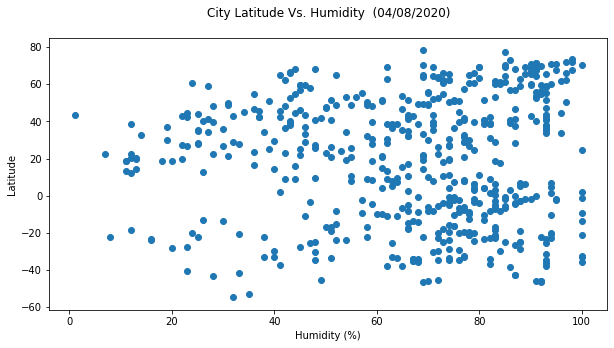

In [180]:

plt.figure(figsize=(10,5))

x_values = cityWeather['Humidity (%)']
y_values = cityWeather['Latitude']

plt.scatter(x_values,y_values)

plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude Vs. Humidity  ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Humidity.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Humidity.


#### Latitude vs. Cloudiness Plot

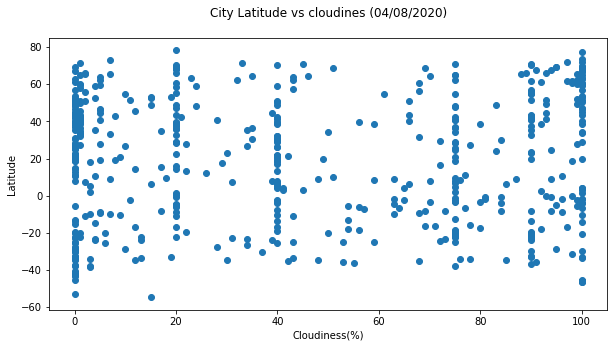

In [181]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Cloudiness (%)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Cloudiness(%)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs cloudines ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Cloudiness.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Cloudiness.



#### Latitude vs. Wind Speed Plot

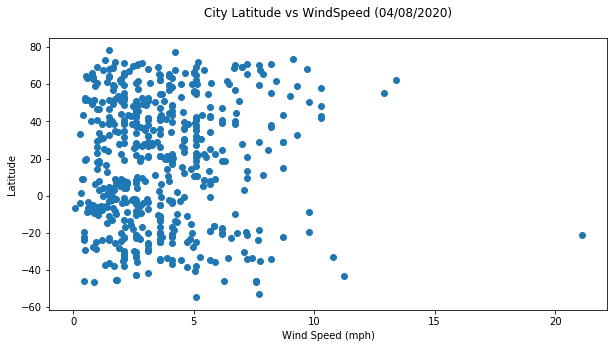

In [182]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Wind Speed (mph)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs WindSpeed ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.WindSpeed.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Wind Speeds.


## Linear Regression

In [183]:
# OPTIONAL: Create a function to create Linear Regression plots


In [184]:
# Create Northern and Southern Hemisphere DataFrames

# Extract latitudes above and below of 0 degress (Equator) to get the hemispheres
northern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) > 0, :]
southern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) < 0,:] 
northern_hem


,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tiznit,29.58,71.474,40,72,1.01
2,pacific grove,36.62,56.948,63,75,4.60
3,talnakh,69.49,33.800,80,100,7.00
7,mehamn,71.04,33.980,94,75,7.20
8,thunder bay,48.40,44.132,42,75,10.30
...,...,...,...,...,...,...
532,rastede,55.10,21.200,57,90,8.20
534,naenwa,51.37,50.504,61,0,0.50
535,kazalinsk,26.98,63.644,23,10,2.85
536,haines junction,26.18,60.098,72,40,1.00


####  Northern Hemisphere -  Temp vs. Latitude Linear Regression

The r-squared value is: -88.17 %


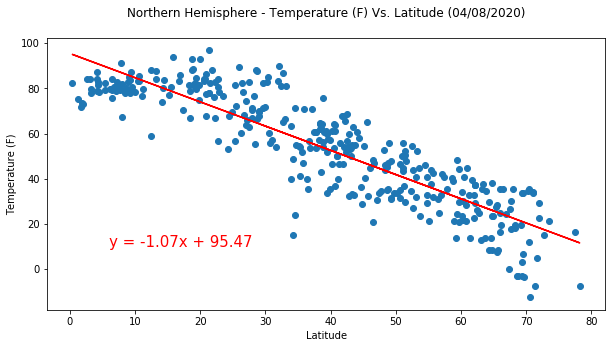

In [185]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Temperature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Northern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.



####  Southern Hemisphere -  Temp vs. Latitude Linear Regression

Line Equation : y = 0.61x + 84.03
The r-squared value is: 75.99 %


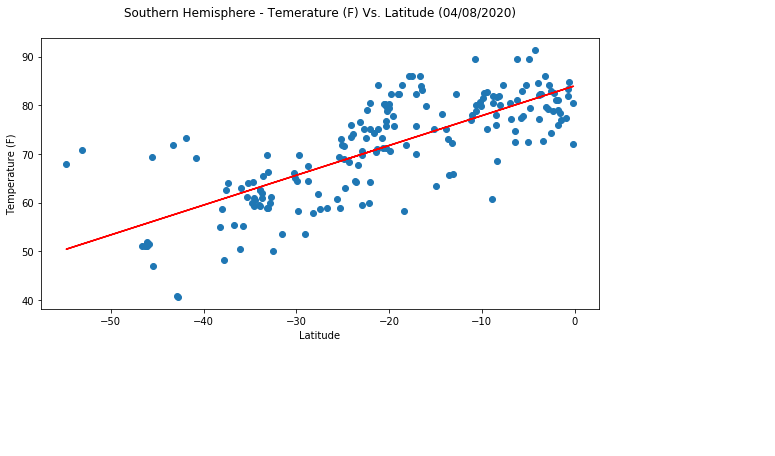

In [198]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Temerature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Southern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 24.08 %


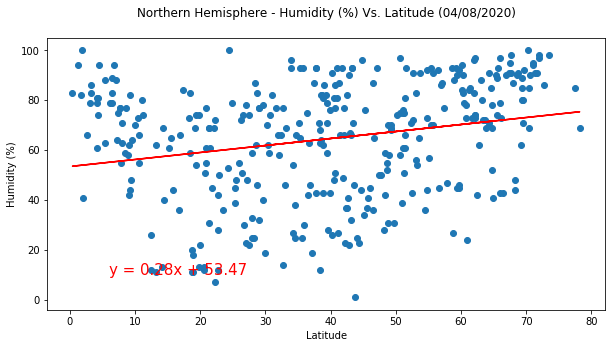

In [187]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Line Equation : y = 0.27x + 76.07
The r-squared value is: 18.0 %


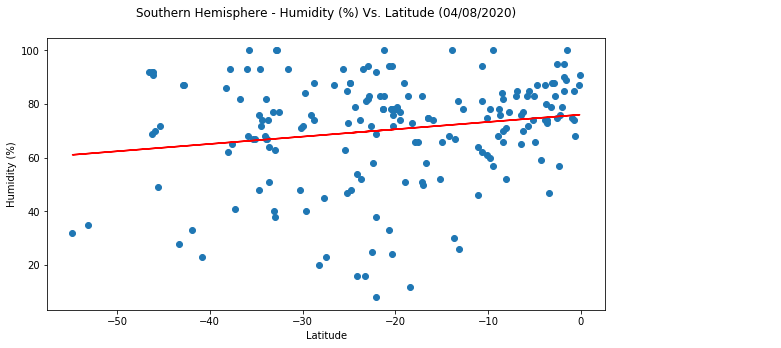

In [200]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title(f'Southern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 13.69 %


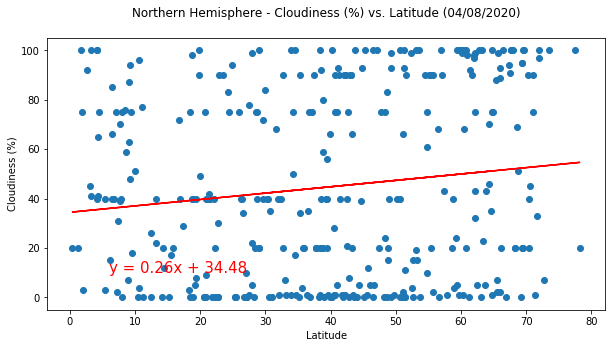

In [189]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not show
much correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Line Equation : y = 0.54x + 62.04
The r-squared is: 19.22 %


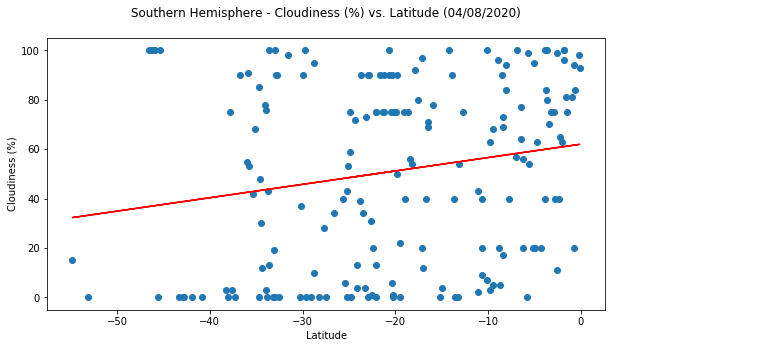

In [206]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of a correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 11.4 %


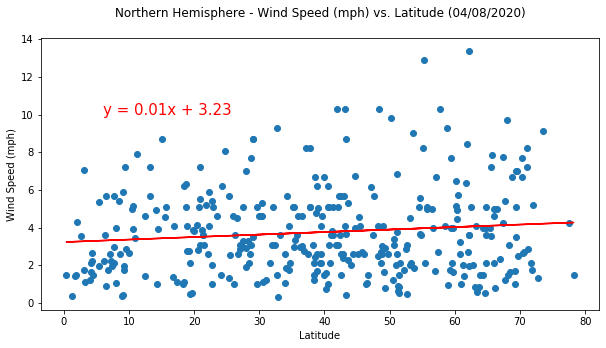

In [191]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not display much of a correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Line Equation : y = -0.05x + 2.51
The r-squared is: -26.22 %


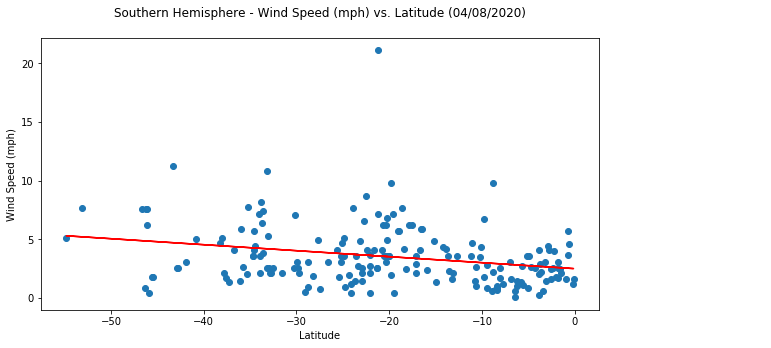

In [207]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of a correlation.